# Medical Data Visualiser 🩺 📊

Final project for the **Data Analysis with Python** course offered by [Free Code Camp](https://www.freecodecamp.org/learn/data-analysis-with-python/#data-analysis-with-python-course). 

Check my certificate [here](https://freecodecamp.org/certification/fcc2a39db6b-7401-45ce-9f42-82b2673914c5/data-analysis-with-python-v7).

In this project, I visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset is available at Free Code Camp.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('medical_examination.csv')

In [8]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI. 

In [9]:
df['bmi'] = df['weight']/(df['height']/100)**2
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight

In [10]:
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [11]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [12]:
df_long = pd.melt(df,id_vars = ['cardio'],var_name = 'variable', value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_long.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


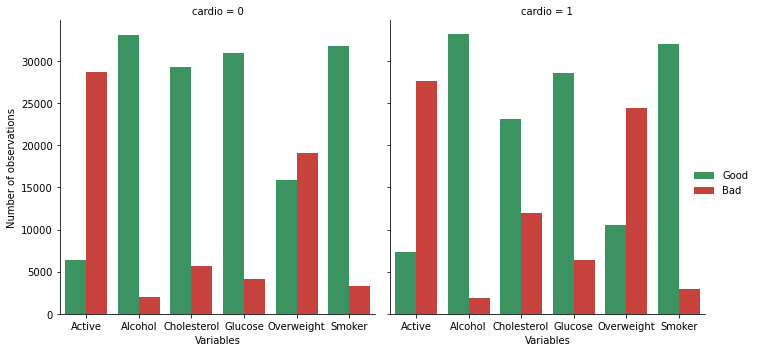

In [13]:
g = sns.catplot(x='variable', data=df_long, hue = 'value', kind='count', col ='cardio',
               palette=sns.color_palette(['#2ca25f', '#de2d26']))
g.set_axis_labels('Variables','Number of observations')
g.set_xticklabels(["Active", "Alcohol",
                   "Cholesterol", "Glucose", "Overweight", "Smoker"])

g._legend.set_title(" ")
new_labels = ['Good', 'Bad']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [14]:
df_clean = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
     ]
df_clean.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [15]:
corr = df_clean.corr()
corr.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000025,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135588,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266305,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862657,0.655926


<AxesSubplot:>

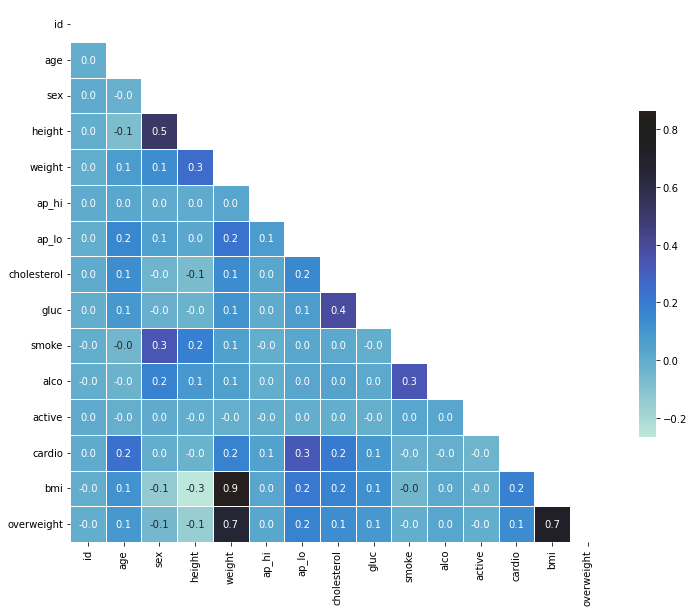

In [18]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0.8,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot = True, fmt = '.1f')
